# 1. Describe why a linear regression model may be appropriate to describe the relationship between Column C “CO (GT)” & Column H “NOx (GT)”, by code & graphs?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Load the Data

In [3]:
dataset = pd.read_csv('AirQuality - AirQualityUCI.csv')

dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Explore the data

In [4]:
dataset.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Text(0.5, 1.0, 'NOx(GT) V/S CO(GT)')

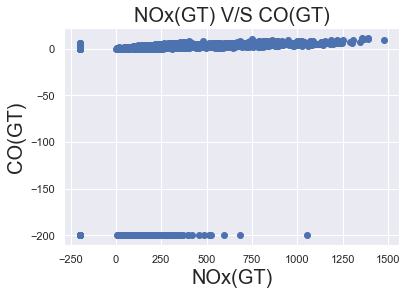

In [5]:
X = dataset['NOx(GT)'].values.reshape(-1,1)
y = dataset['CO(GT)'].values.reshape(-1,1)
X.shape
y.shape
plt.scatter(X,y)
plt.xlabel('NOx(GT)',fontsize=20)
plt.ylabel('CO(GT)', fontsize=20)
plt.title('NOx(GT) V/S CO(GT)', fontsize=20)

# By observing the data we can see that there is no relationship between CO(GT) and NOx(GT), However we can observe there many missing values (-200) in the dataset and therefore we need to carry out some data preprocessing to find the relationship

In [6]:
dataset.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
#By above we can infer that there is no Nullvalues in the features
dataset['NOx(GT)'].replace(-200, np.nan, inplace = True)
dataset['CO(GT)'].replace(-200, np.nan, inplace = True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(6), int64(7), object(2)
memory usage: 1.1+ MB


In [9]:
# We can infer that we CO(GT) has 7674 non-null float64 and NOx(GT) 7718 non-null float64 
# therefore if we drop these values 

drop = dataset.dropna()

#using info
drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 9356
Data columns (total 15 columns):
Date             7261 non-null object
Time             7261 non-null object
CO(GT)           7261 non-null float64
PT08.S1(CO)      7261 non-null int64
NMHC(GT)         7261 non-null int64
C6H6(GT)         7261 non-null float64
PT08.S2(NMHC)    7261 non-null int64
NOx(GT)          7261 non-null float64
PT08.S3(NOx)     7261 non-null int64
NO2(GT)          7261 non-null int64
PT08.S4(NO2)     7261 non-null int64
PT08.S5(O3)      7261 non-null int64
T                7261 non-null float64
RH               7261 non-null float64
AH               7261 non-null float64
dtypes: float64(6), int64(7), object(2)
memory usage: 907.6+ KB


# We cannot drop null values as almost 25% of data is lost if we drop them and  therefore removing them is not an option as it will impact the quality of our model

In [10]:
#Using Sklearn also we can perform the below operations using SimpleImputer library
#Let's input preprocessing library using Pandas built in function for mean:
#mean_val_no = dataset['NOx(GT)'].mean()
dataset['NOx(GT)'] = dataset['NOx(GT)'].fillna(method='ffill')
#mean of 'NOx(GT)' is 246.896735 which replaces all the NaN values


#mean_val_co = dataset['CO(GT)'].mean()
dataset['CO(GT)'] = dataset['CO(GT)'].fillna(method='ffill')
#mean of 'CO(GT)' is 2.15275 which replaces all the NaN values 

Text(0.5, 1.0, 'NOx(GT) V/S CO(GT)')

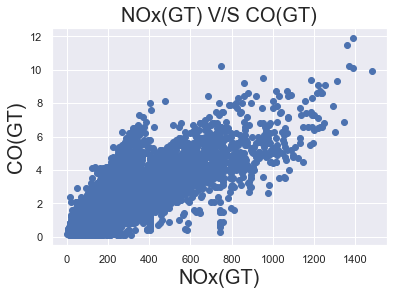

In [11]:
X = dataset['NOx(GT)'].values.reshape(-1,1)
y = dataset['CO(GT)'].values.reshape(-1,1)
X.shape
y.shape
plt.scatter(X,y)
plt.xlabel('NOx(GT)',fontsize=20)
plt.ylabel('CO(GT)', fontsize=20)
plt.title('NOx(GT) V/S CO(GT)', fontsize=20)

# From the above it is clear that when we have substituted the missing values (-200) with the appropraiate mean values for NOx(GT) and CO(GT) perhaps there exist a Linear Regression 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
print('Intercept : ', reg.intercept_)
print('Co-efficient : ', reg.coef_)
#print('Simple Linear Regression : ', reg.predict(X,y))

Intercept :  [0.73724895]
Co-efficient :  [[0.00557854]]


In [14]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual Value' : y_test.flatten(), 'Predicted Value' : y_pred.flatten()})
print(df)

      Actual Value  Predicted Value
0              1.0         0.971548
1              0.5         0.893448
2              1.2         2.304820
3              0.7         1.005019
4              1.7         1.239318
5              2.0         2.221142
6              1.9         1.345310
7              3.9         3.498628
8              1.8         2.338291
9              3.5         3.788712
10             0.9         2.131885
11             1.3         1.970107
12             1.0         1.551716
13             1.7         2.170935
14             2.5         1.707916
15             3.1         1.914322
16             3.4         2.812467
17             3.6         3.191808
18             5.6         3.749663
19             1.0         1.010598
20             0.8         1.484774
21             7.9         5.155456
22             1.2         2.304820
23             2.2         1.540559
24             1.7         2.561433
25             2.9         1.786015
26             0.9         1

In [15]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
print('Mean Squared Error : ', mse(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(mse(y_test,y_pred)))
print('R^2 : ', r2(y_test, y_pred))

Mean Squared Error :  0.8297029109083202
Root Mean Squared Error :  0.9108802944999524
R^2 :  0.6260984239189883


# Now visualising our Model we get :

Text(0.5, 1.0, 'Simple Linear regression NOx(GT) V/S CO(GT)')

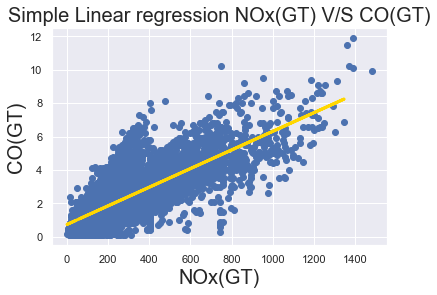

In [16]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, color='gold',linewidth=3)
plt.xlabel('NOx(GT)',fontsize=20)
plt.ylabel('CO(GT)', fontsize=20)
plt.title('Simple Linear regression NOx(GT) V/S CO(GT)', fontsize=20)

# By using 5 methods of Linear Regression Assumptions we can conclude that Linear Regression is the best fit for our data:
    1) Linear relation between dependant and independant variable
    2) No Multi collinearity between independant variable
    3) Error Function achives a Normal Distribution proved by Log Transformation
    4) No Auto correlation between the error patterns
    5) No Endogenity between error and independant variable